In [ ]:
import os
os.chdir("..") # Move up one directory to access the package from the project root

# Import and run dataset generation function, generate 300 simulated price paths and display the first few rows
from rice_ml.simulate_sde import generate_regime_dataset
df = generate_regime_dataset(300)
df.head()

,regime,sigma,mean,std,skew,kurt
0,volatile,0.400000,110.526416,10.051417,-0.463404,0.210079
1,volatile,0.400000,114.798016,10.244170,0.331755,-0.839179
2,stochastic,0.433374,87.499109,20.473315,-0.100676,-1.033965
3,volatile,0.400000,109.475836,8.981543,0.581834,-0.633792
4,calm,0.100000,103.052968,2.461192,0.706260,-0.726330


### Simulated Regime Dataset Preview
We generate 300 synthetic market paths using the **Black-Scholes** stochastic differential equation under three different volatility regimes:
- **Calm:** low volatility ($\sigma=0.1$)
- **Volatile:** high volatility ($\sigma=0.4$)
- **Stochastic:** randomly drawn ($\sigma \in [0.2, 0.6]$)

The resulting dataframe contains one row per simulated path, with descriptive statistics (`mean`, `std`, `skew`, `kurt`) that can later serve as features for classification models. 

The preview confirms that all regimes are represented and that volatility levels vary accordingly. 

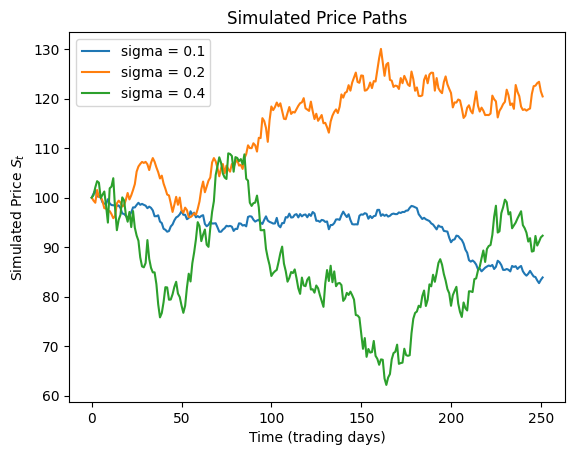

In [ ]:
import matplotlib.pyplot as plt
from rice_ml.simulate_sde import sim_black_scholes

# Plot a few sample price paths with different volatility levels
for sigma in [0.1, 0.2, 0.4]:
    S = sim_black_scholes(sigma=sigma)
    plt.plot(S, label=f"{sigma = }")
plt.xlabel("Time (trading days)")
plt.ylabel("Simulated Price $S_t$")
plt.legend(); plt.title("Simulated Price Paths"); plt.show()

### Comparing Volatility Regimes
Higher volatility $\sigma$ produces larger fluctuations in simulated prices. 
The calm regime ($\sigma=0.1$) yields smaller, tighter swings while higher-volatility paths ($\sigma=0.4$) exhibit wide, jagged movements and no constant trend. This behavior reflects how uncertainty amplifies random shocks in the Black-Scholes model.